In [84]:
#####################################      Function Definition Block    ###############################################

# Read the modeling data from the CSV file
def get_lending_club_data():
    raw_data = pd.read_csv("modeling_dataset.csv", low_memory = False)
    return(raw_data)

def data_clean(raw_data):
    no_incomplete_rows = raw_data[raw_data['broke_up'].isin([0, 1])]
# Removing the features which does not contain much information, have large number missing values, or not significant for 
# the model
    no_Significant_no_info_features = ['CASEID_NEW', 'members_lt_2',  'members_13_to_17', 'members_gt_18', 'members_2_to_5', 'members_6_to_12',
                               'weight1', 'weight2',  'weight3', 'weight4',  'weight5',  'weight6',  'weight7', 
                               'weight_couples_coresident','bg_survey_date','next_next_year','intro_summary_codes',
                               'target_survey_dt','survey_date','same_gender_partner','partners_religion_at_16','religion_at_16',
                               'has_domestic_partnership','has_civil_union','no_domestic_partnership_or_civil_union','attended_same_college',
                               'how_met_online','partner_gender','lived_together_before_married','time_dating_until_married',
                               'time_met_until_married','time_met_until_dating','marriage_count_combined','zip_pct_white','zip_pct_black',
                               'zip_pct_hispanic','zip_median_income','zip_pct_foreign_born','zip_rural']
# Selecting only the required or significant features
    final_features = no_incomplete_rows.drop(no_Significant_no_info_features, axis = 1)
    return(final_features)

In [85]:
###############################                 Exploratory and Data Analysis        ##################################
# Importing the required libraries
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn import preprocessing

#Adjusting the display options of Pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Importing the python matplot library for exploratory data analysis
import matplotlib.pyplot as plt
import pandas as pd

# Import the raw data from the csv file
raw_data = get_lending_club_data()

# Identifying the column names 
list(raw_data)


['CASEID_NEW',
 'highest_degree_received',
 'education',
 'head_of_household_indicator',
 'household_size',
 'housing_type',
 'household_income',
 'marital_status',
 'msa_status',
 'region_4',
 'region_9',
 'own_rent',
 'members_lt_2',
 'members_13_to_17',
 'members_gt_18',
 'members_2_to_5',
 'members_6_to_12',
 'employment_status',
 'has_internet_access',
 'bg_survey_date',
 'age',
 'children_in_hh',
 'next_next_year',
 'gender',
 'race',
 'hispanic',
 'out_of_closet',
 'political_affiliation',
 'born_again',
 'religion',
 'weight1',
 'weight2',
 'weight3',
 'weight4',
 'weight5',
 'weight6',
 'weight7',
 'weight_couples_coresident',
 'glb_status',
 'same_gender_partner',
 'partner_latino',
 'partners_race',
 'partner_born_again',
 'partners_religion',
 'partners_relgion_same_as_age_16',
 'partners_religion_at_16',
 'partners_highest_education',
 'partners_mothers_highest_education',
 'partners_political_affiliation',
 'religion_same_as_age_16',
 'religion_at_16',
 'mothers_highest_e

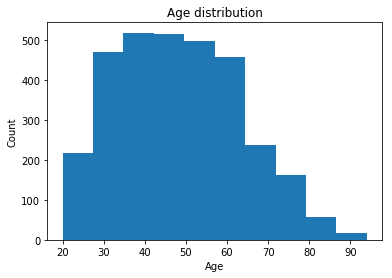

In [86]:
# Exploratory Data Analysis for Age Variable

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(raw_data['age'],bins = 10)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


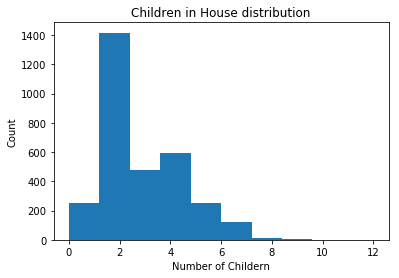

In [87]:
# Exploratory Data Analysis for children_in_hh Variable
fig=plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(raw_data['children_in_hh'],bins = 10)

plt.title('Children in House distribution')
plt.xlabel('Number of Childern')
plt.ylabel('Count')
plt.show()

broke_up
0    2967
1     178
Name: broke_up, dtype: int64


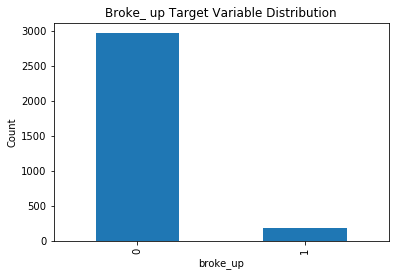

In [88]:
# Exploratory Data Analysis for broke_up Variable

var = raw_data.groupby('broke_up').broke_up.count()  
print(var)
plt.title('Broke_ up Target Variable Distribution')
plt.xlabel('Broke Up')
plt.ylabel('Count')
var.plot(kind='bar')
plt.show()

marital_status
divorced                135
living with partner     558
married                2134
never married           249
separated                40
widowed                  29
Name: broke_up, dtype: int64


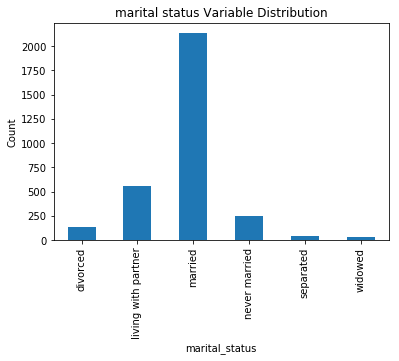

In [89]:
# Exploratory Data Analysis for marital_status Variable

    var = raw_data.groupby('marital_status').broke_up.count()  
print(var)
plt.title('marital status Variable Distribution')
plt.xlabel('marital status')
plt.ylabel('Count')
var.plot(kind='bar')
plt.show()

couple_religion
both baptist                  267
both catholic                 411
both none                     254
both other christian          185
both protestant               433
catholic/baptist               76
catholic/protestant           225
none/baptist                   49
none/catholic                 160
none/other christian           94
other christian/baptist        65
other christian/catholic       76
other different               363
other same                    187
protestant/baptist             65
protestant/none               126
protestant/other christian    109
Name: broke_up, dtype: int64


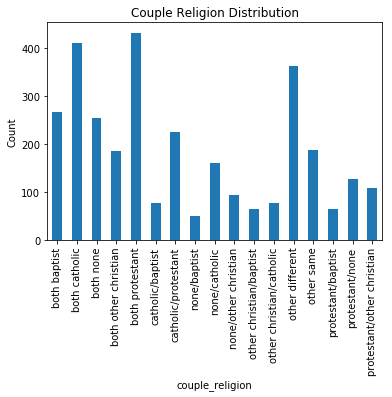

In [90]:
# Exploratory Data Analysis for couple_religion Variable
var = raw_data.groupby('couple_religion').broke_up.count()  
print(var)
plt.title('Couple Religion Distribution')
plt.xlabel('Couple Religion')
plt.ylabel('Count')
var.plot(kind='bar')
plt.show()

In [91]:
# Exploring the features min, max, count etc values by gouping by broke_up variable
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
explore_features = raw_data.drop(['CASEID_NEW'], axis = 1)
test = explore_features.groupby('broke_up')
test.describe()

acquainted_before_dated          age  age_when_relationship_started  been_divorced  children_in_hh  currently_married   glb_status  has_internet_access  head_of_household_indicator  household_size         income  intro_by_other_text  lived_together_before_married  living_together  marriage_count_combined  members_13_to_17  members_2_to_5  members_6_to_12  members_gt_18  members_lt_2  met_at_other_text  next_next_year  time_dating_until_married  time_met_until_dating  time_met_until_married  time_since_cohab  time_since_first_relationship  time_since_met  time_since_romantic        weight1        weight2        weight3        weight4        weight5
broke_up                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
0        count              2961.000000  2967.000000                    2951.000000    2967.000000     2967.000000        2967.000000  2967.000000          2967.000000                  2967.000000     2967.000000    2967.000000          2967.000000                    2131.000000      2967.000000              2807.000000       2967.000000     2967.000000      2967.000000    2967.000000   2967.000000        2967.000000     2967.000000                2140.000000            2948.000000             2144.000000       2706.000000                    2951.000000     2961.000000          2951.000000    2967.000000    2967.000000    2967.000000    2967.000000    2967.000000
         mean                  0.377575    48.764408                      27.884107       0.253455        2.919110           0.716549     0.211999             0.871250                     0.874284        2.924166   73741.519885             0.097405                       0.377757         0.882373                 1.067332          0.176272        0.182002         0.283788       2.204921      0.074486           0.330974     2011.896528                   2.989720               1.337856                4.140392         20.901166                      21.440154       22.733866            21.372625   56158.233906   56158.233906   56158.233906   57101.508257   76158.917762
         std                   0.484862    14.818415                      10.931999       0.435062        1.396290           0.450750     0.408793             0.334979                     0.331585        1.412775   42261.715553             0.296558                       0.484940         0.322221                 0.759420          0.485393        0.473049         0.644770       0.771502      0.275144           0.470643        1.127005                   3.684227               3.825224                4.674408         14.256499                      14.522803       14.904989            14.596910   47758.015428   47758.015428   47758.015428   48069.775457   64109.261918
         min                   0.000000    20.000000                      13.000000       0.000000        0.000000           0.000000     0.000000             0.000000                     0.000000        1.000000    5000.000000             0.000000                       0.000000         0.000000                 0.000000          0.000000        0.000000         0.000000       1.000000      0.000000           0.000000     2011.000000                   0.000000               0.000000                0.000000          2.084932                       2.134247        2.084932             2.076712     522.000000     522.000000     522.000000     528.000000

In [92]:
# Finding out all the columns that have missing values

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

raw_data.isnull().sum()

CASEID_NEW                                   0
highest_degree_received                      0
education                                    0
head_of_household_indicator                  0
household_size                               0
housing_type                                 0
household_income                             0
marital_status                               0
msa_status                                   0
region_4                                     0
region_9                                     2
own_rent                                     0
members_lt_2                                 0
members_13_to_17                             0
members_gt_18                                0
members_2_to_5                               0
members_6_to_12                              0
employment_status                            0
has_internet_access                          0
bg_survey_date                               0
age                                          0
children_in_h

In [93]:
###################################              Data Processing Block           ######################################

# Clean and process the data 
final_features = data_clean(raw_data)

# Segregating the Categorical and Numerical Variables
categorical = final_features.select_dtypes(include=['object'])
numeric = final_features.select_dtypes(exclude=['object'])

#Defining the Dummy variables for the categorical variables 
for name, values in categorical.items():
    dummies = pd.get_dummies(values.str.strip(), prefix = name, dummy_na=True)
    numeric = pd.concat([numeric, dummies], axis=1)
    
#Imputing the missing values  
for name in numeric:
    if pd.isnull(numeric[name]).sum() > 0:
        numeric["%s_mi" % (name)] = pd.isnull(numeric[name])
        median = numeric[name].median()
        numeric[name] = numeric[name].apply(lambda x: median if pd.isnull(x) else x)

In [104]:
##########################    Target and Independent Variables & Creating holdout     #################################

# Declaring the target variable and independent variables

y = numeric['broke_up']
X = numeric.drop(['broke_up'], axis = 1)

# Creating a Holdout and using Statified sampling
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [109]:
###############################         Regularized Logistic Regression Block        ###################################
from sklearn import linear_model
lr = linear_model.SGDClassifier(loss='log', penalty='elasticnet', n_jobs = -1)

# set up cv
from sklearn import model_selection
cv = model_selection.KFold(5)

# pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler())
                           , ('model', lr) ])

# tune the model
my_ratio = np.linspace(0.1,1, num = 10)
my_alpha = np.logspace(0.001, 1, num = 10)

from sklearn.model_selection import GridSearchCV
optimized_lr = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid=dict(model__alpha = my_alpha, model__l1_ratio = my_ratio)
                            , scoring = 'roc_auc'
                            , verbose = 1
                            , n_jobs = -1
                           )
optimized_lr.fit(X_train, y_train)


#Get the best estimator from the grid Search
print(optimized_lr.best_estimator_)
print(" The optimized_lr.best_score is : ", optimized_lr.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


Pipeline(steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', SGDClassifier(alpha=1.2941958414499861, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=1.0,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=-1,
       penalty='elasticnet', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False))])
 The optimized_lr.best_score is :  0.500841785487


In [112]:
#####################################     Decision Tree  Model Block     ###############################################
#Decision Tree model
from sklearn import tree
dt = tree.DecisionTreeClassifier()

# set up cv
from sklearn import model_selection
cv = model_selection.KFold(5)

# pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler()),('model', dt) ])


# Parameters for tuning the model
tree_depth = [5,6,7]
tree_min_samples_split = [5, 10, 20]
tree_min_samples_leaf = [5, 10, 15]
tree_max_leaf_nodes = [10,15,25]
#Implementing GridSearchCV
from sklearn.model_selection import GridSearchCV
optimized_dt = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid=dict(model__max_depth= tree_depth, 
                                              model__min_samples_split = tree_min_samples_split,
                                              model__min_samples_leaf = tree_min_samples_leaf,
                                              model__max_leaf_nodes = tree_max_leaf_nodes)
                            , scoring = 'roc_auc'
                            , verbose = 1
                            , n_jobs = -1)

#Fitting the model with Grid Search
optimized_dt.fit(X_train, y_train)

#Get the best estimator from the grid Search
print(optimized_dt.best_estimator_)
print(" The optimized_dt.best_score is : ", optimized_dt.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   57.6s finished


Pipeline(steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=15, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
 The optimized_dt.best_score is :  0.747112598466


In [105]:
####################################       Random Forest Model Block     ##############################################

#Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# set up cv
from sklearn import model_selection
cv = model_selection.KFold(5)

# pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler()),('model', rf) ])


# Parameters for tuning the model
tree_depth = [5,6,7]
tree_min_samples_split = [5, 10, 20]
tree_min_samples_leaf = [5, 10,15]
tree_max_leaf_nodes = [10,15,25]
#Implementing GridSearchCV
from sklearn.model_selection import GridSearchCV
optimized_rf = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid=dict(model__max_depth= tree_depth, 
                                              model__min_samples_split = tree_min_samples_split,
                                              model__min_samples_leaf = tree_min_samples_leaf,
                                              model__max_leaf_nodes = tree_max_leaf_nodes)
                            , scoring = 'roc_auc'
                            , verbose = 1
                            , n_jobs = -1)

#Fitting the model with Grid Search
optimized_rf.fit(X_train, y_train)

#Get the best estimator from the grid Search
print(optimized_rf.best_estimator_)
print(" The optimized_rf.best_score is : ", optimized_rf.best_score_)



Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   53.6s finished


Pipeline(steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=25,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])
 The optimized_rf.best_score is :  0.835580395377


In [106]:
###############################        Gradient Boosted Tree Classifier Block        ###################################
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()


# set up cv
from sklearn import model_selection
cv = model_selection.KFold(5)

# pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler()),('model', gbc) ])

# Parameters for tuning the model
gbc_learning_rate = [0.1, 0.05, 0.02, 0.01]
gbc_max_depth = [4, 6]
gbc_min_samples_leaf = [3, 5, 9, 17]
gbm_max_features = [1.0, 0.3, 0.1]

#Implementing GridSearchCV
from sklearn.model_selection import GridSearchCV
optimized_gbc = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid=dict(model__learning_rate= gbc_learning_rate, 
                                              model__max_depth = gbc_max_depth,
                                              model__min_samples_leaf = gbc_min_samples_leaf,
                                              model__max_features = gbm_max_features)
                            , scoring = 'roc_auc'
                            , verbose = 1
                            , n_jobs = -1)

#Fitting the model with Grid Search
optimized_gbc.fit(X_train, y_train)

#Get the best estimator from the grid Search
print(optimized_gbc.best_estimator_)
print(" The optimized_gbc.best_score is :", optimized_gbc.best_score_)
        

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 10.5min finished


Pipeline(steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=4,
              max_features=0.1, max_leaf_nodes=None,
              min_impurity_...=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))])
 The optimized_gbc.best_score is : 0.823525461123


In [120]:
####################     Test on Hold Out for Random Forest as it has the Higest score    #########################

from sklearn.metrics import roc_auc_score
y_pred = optimized_rf.predict_proba(X_test)[:, 1]

roc_on_holdout = roc_auc_score(y_test, y_pred)

print("The AUC the final model choosen is ", roc_on_holdout)

The AUC the final model choosen is  0.858019486603


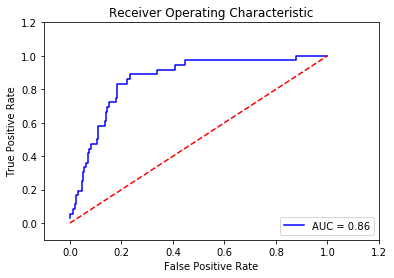

In [111]:
##################################               Plotting the ROC Curve               #############################
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()